<img src="./images/logo.png"/>

The data comes from this page:  https://www.kaggle.com/datasets/rush4ratio/video-game-sales-with-ratings

In [1]:
#Import package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [2]:
#Loading and cleaning data 
data=pd.read_csv('Video_Games_Sales_as_at_22_Dec_2016.csv')

data['User_Score']=data['User_Score'].replace('tbd',np.NaN)
data=data.dropna(subset=['Name','Year_of_Release', 'Genre', 'Publisher'])
data['User_Score']=data['User_Score'].astype('float')
data['Year_of_Release']=data['Year_of_Release'].astype('int64')

data.describe()

Year_of_Release      NA_Sales      EU_Sales      JP_Sales  \
count     16416.000000  16416.000000  16416.000000  16416.000000   
mean       2006.489888      0.264129      0.146034      0.078623   
std           5.881148      0.819028      0.507134      0.311348   
min        1980.000000      0.000000      0.000000      0.000000   
25%        2003.000000      0.000000      0.000000      0.000000   
50%        2007.000000      0.080000      0.020000      0.000000   
75%        2010.000000      0.240000      0.110000      0.040000   
max        2020.000000     41.360000     28.960000     10.220000   

        Other_Sales  Global_Sales  Critic_Score  Critic_Count   User_Score  \
count  16416.000000  16416.000000   7982.000000   7982.000000  7461.000000   
mean       0.047670      0.536708     68.997119     26.440992     7.126900   
std        0.188156      1.559885     13.918755     19.009305     1.498886   
min        0.000000      0.010000     13.000000      3.000000     0.000000   
25%        0.000000      0.060000     60.000000     12.000000     6.400000   
50%        0.010000      0.170000     71.000000     22.000000     7.500000   
75%        0.030000      0.470000     79.000000     36.000000     8.200000   
max       10.570000     82.530000     98.000000    113.000000     9.700000   

         User_Count  
count   7461.000000  
mean     163.008846  
std      563.932422  
min        4.000000  
25%       10.000000  
50%       24.000000  
75%       81.000000  
max    10665.000000

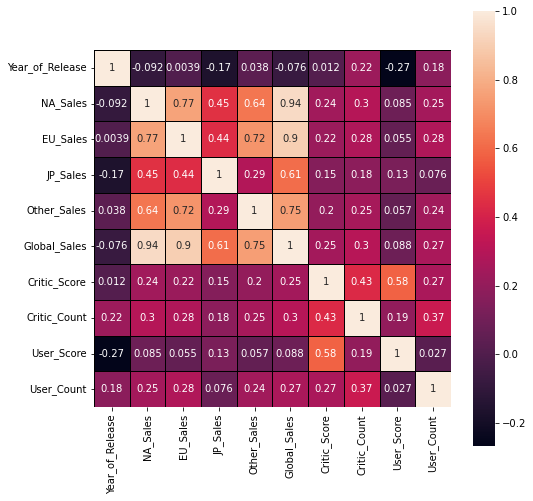

In [3]:
#Heatmap
plt.figure(figsize = (8,8))
ax = sns.heatmap(data.corr(),  linewidths=0.5, square=True, linecolor='black', annot=True)

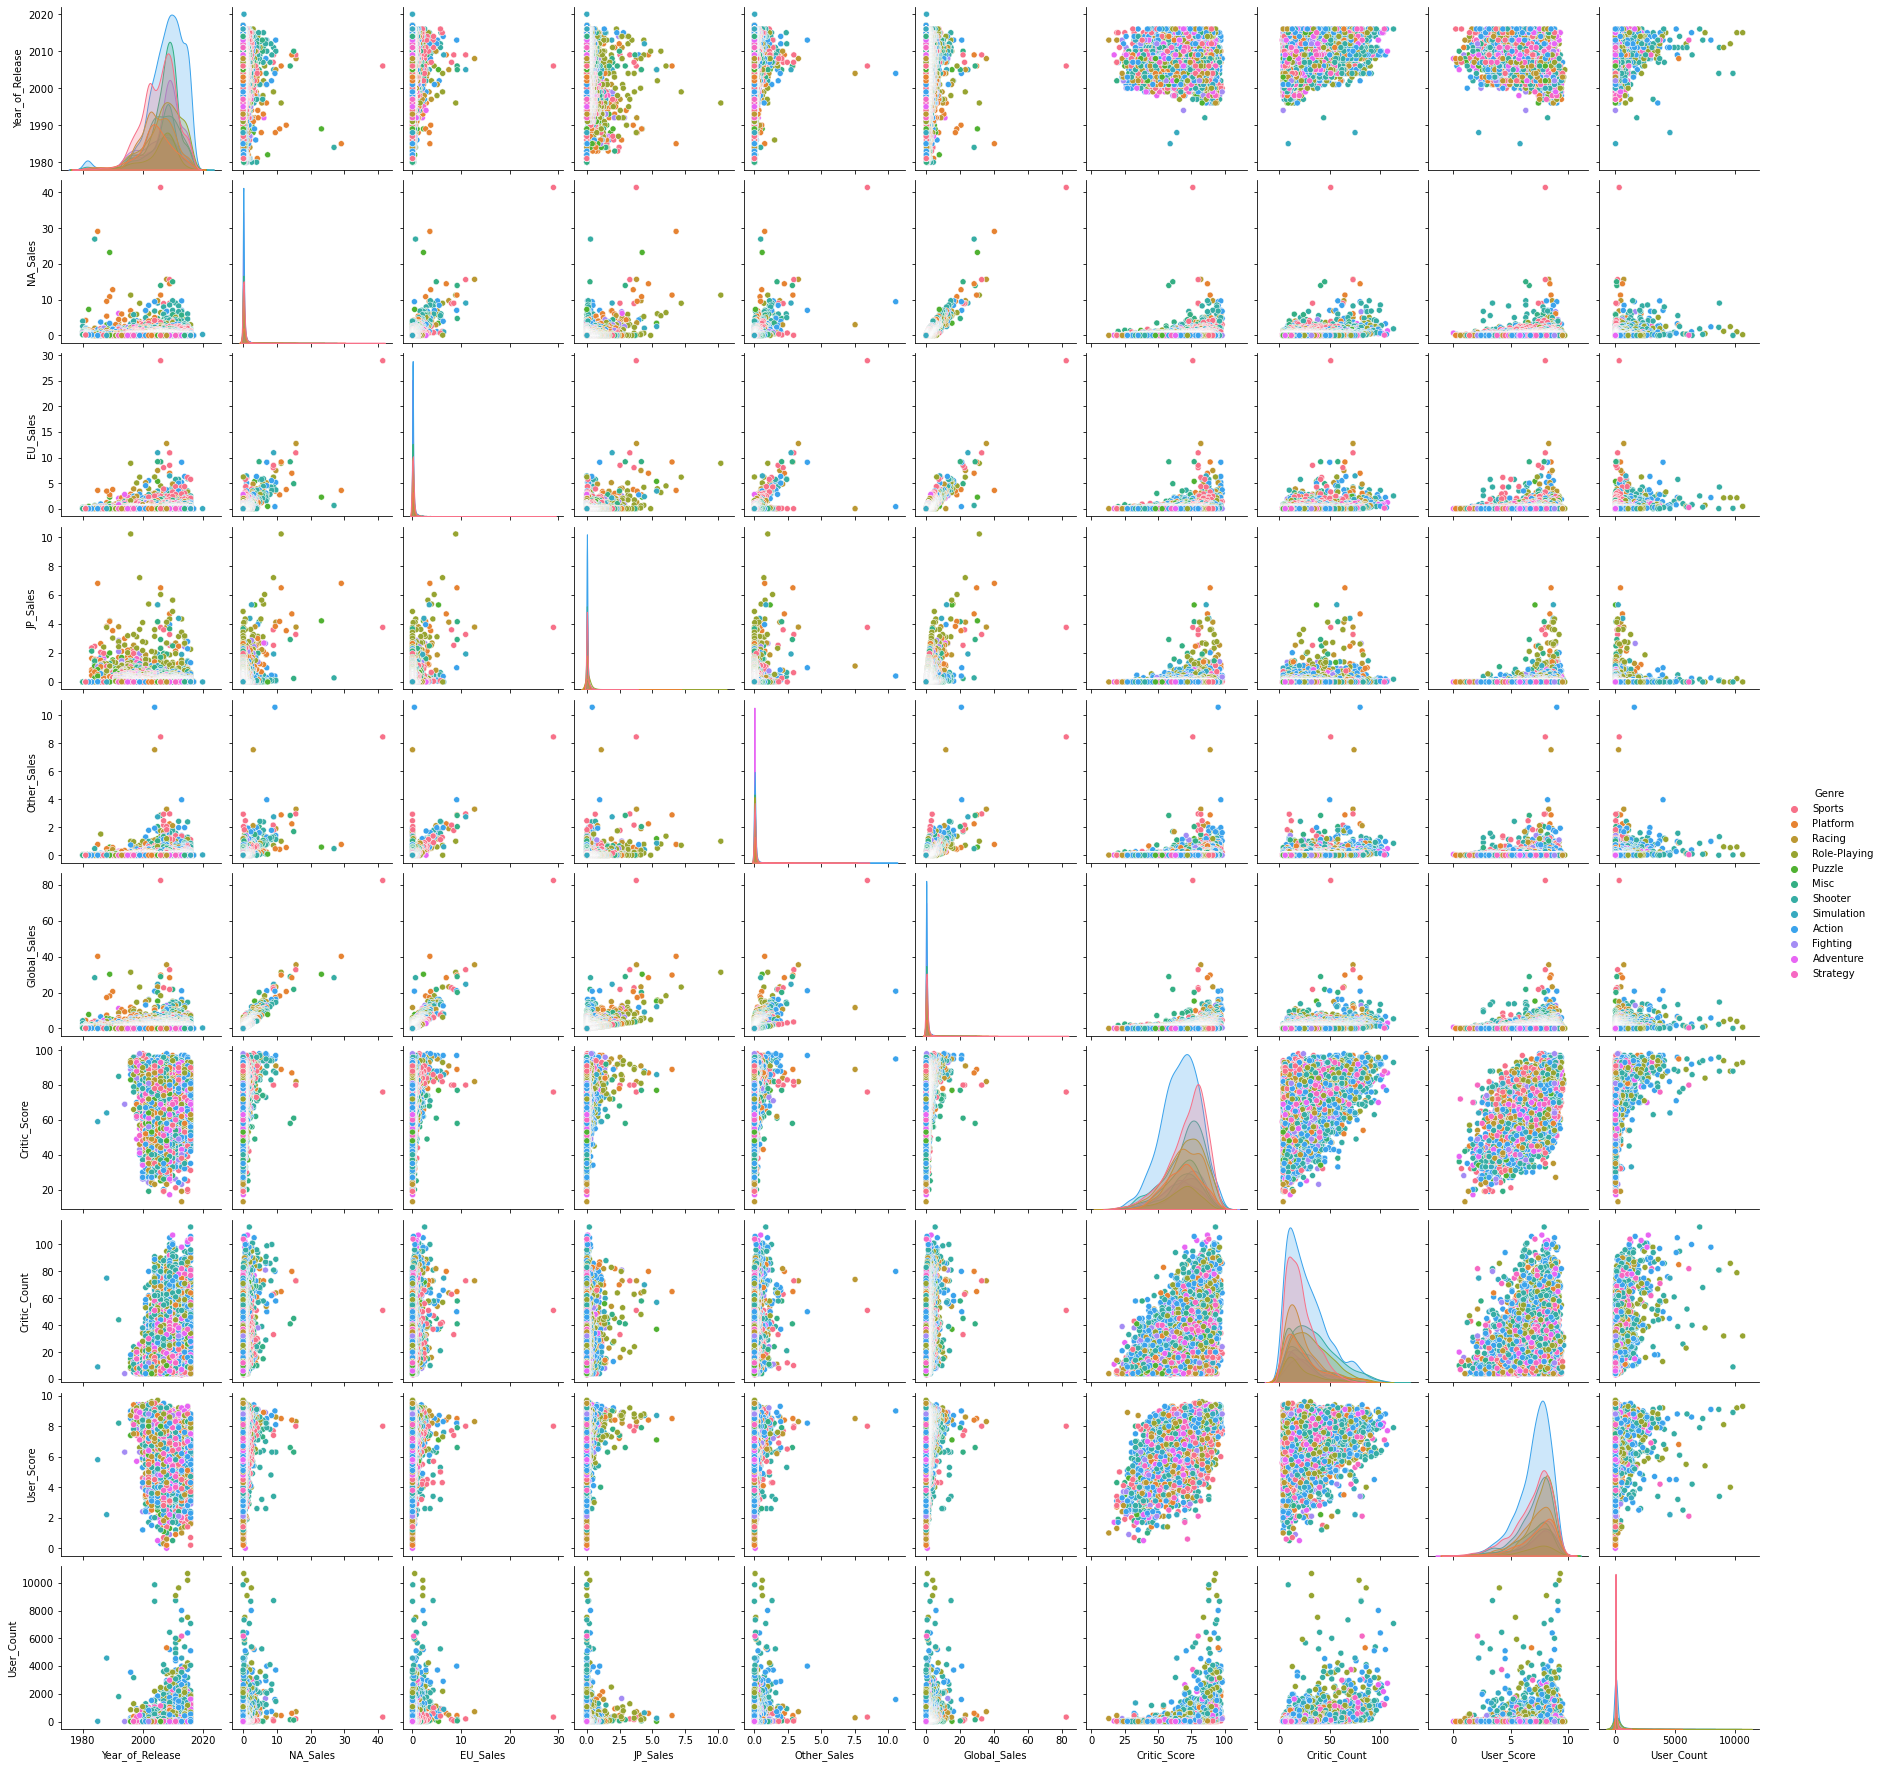

In [4]:
#Pairplot by genre
ax=sns.pairplot(data, hue="Genre")

In [5]:
#Games released on the platform
Platform_names=data['Platform'].value_counts().index.tolist()
number_of_games1=data['Platform'].value_counts().tolist()

fig = px.bar(x=Platform_names[:15],
             y=number_of_games1[:15],
             title='Games released on the platform',
             labels=dict(x="Platform",y="Number of games"))
fig.update_traces(marker_color='#336699')
fig.show()

In [6]:
#Number of games released by the publisher
publisher_names=data['Publisher'].value_counts().index.tolist()
number_of_games2=data['Publisher'].value_counts().tolist()

fig = px.bar(x=number_of_games2[:15][::-1],
             y=publisher_names[:15][::-1],
             title='Number of games released by the publisher',
             labels=dict(x="Number of games",y="Publisher"))
fig.update_traces(marker_color='#008060')
fig.show()

In [7]:
#Number of games released by the developer
Developer_names=data['Developer'].value_counts().index.tolist()
number_of_games3=data['Developer'].value_counts().tolist()

fig = px.bar(x=number_of_games3[:15][::-1],
             y=Developer_names[:15][::-1],
             title='Number of games released by the developer',
             labels=dict(x="Number of games",y="Developer"))
fig.update_traces(marker_color='#ff6666')
fig.show()

In [8]:
#Best-selling games
Game_names=data['Name']
sales=data['Global_Sales']

fig = px.bar(x=sales[:15][::-1],
             y=Game_names[:15][::-1],
             title='Best-selling games',
             labels=dict(x="Global Sales in milion units",y="Game name"))
fig.update_traces(marker_color='#ad887c')
fig.show()

In [9]:
#Highest game score
grouped_by_Name=data.groupby(['Name'])
best_games_critics=(grouped_by_Name.Critic_Score.mean()).sort_values(ascending=False)
best_games_users=(grouped_by_Name.User_Score.mean()).sort_values(ascending=False)

fig = make_subplots(rows=2, cols=1)
fig.add_trace(
    go.Bar(x=best_games_critics[:10][::-1]/10,
           y=best_games_critics[:10][::-1].index,
           name='Best games by critics',
           orientation='h'),
    row=1, col=1
)

fig.add_trace(
    go.Bar(x=best_games_users[:10][::-1], 
           y=best_games_users[:10][::-1].index,    
           name='Best games by users',
           orientation='h'),
    row=2, col=1
)
fig.update_layout(height=600,
                  width=800,
                  title_text="Highest game score",
                  xaxis=dict(range=[9,10]),
                  xaxis2=dict(range=[9,10]),
                  xaxis_title="game rating by critics",
                  yaxis_title="game name",
                  xaxis2_title="game rating by users",
                  yaxis2_title="game name",                 
                 )
fig.show()

In [10]:
#Distribution of game genres 
number_of_genres=data['Genre'].value_counts()
genre_name=data['Genre'].value_counts().index

fig = px.pie(data,
             values=number_of_genres,
             names=genre_name,
             title='Distribution of game genres',
             color_discrete_sequence=px.colors.sequential.Burgyl)
fig.show()

In [11]:
#Best-selling game genres
grouped_by_genre=data.groupby(['Genre'])
sales=(grouped_by_genre.Global_Sales.sum()).sort_values(ascending=False)

fig = px.bar(x=sales[::-1],
             y=sales.index[::-1],
             title='Best-selling game genres',
             labels=dict(x="Global sales in milion units",y="Genre"))
fig.update_traces(marker_color='#99bbff')
fig.show()

In [12]:
#Ratings comparison by genre
grouped_by_genre=data.groupby(['Genre'])
average_user_rating=grouped_by_genre.User_Score.mean()
average_rating_of_critics=grouped_by_genre.Critic_Score.mean()/10

fig = go.Figure()
fig.add_trace(go.Scatter(x=average_user_rating.index,
                         y=average_user_rating,
                         mode='lines+markers',
                         name='Average user ratings'))
fig.add_trace(go.Scatter(x=average_rating_of_critics.index,
                         y=average_rating_of_critics,
                         mode='lines+markers',
                         name='Average rating by critics'))
fig.update_layout(title_text="Ratings comparison by genre",
                  xaxis_title="genre",
                  yaxis_title="rating")

fig.show()

In [13]:
#The most common ESRB ratings
grouped_by_ratings=data.groupby(['Rating'])
number_of_ratings=(grouped_by_ratings.Global_Sales.sum()).sort_values(ascending=False)

fig = px.bar(x=number_of_ratings.index,
             y=number_of_ratings,
             title='The most common ESRB ratings',
             labels=dict(x="Rating",y="Number of ratings"))
fig.update_traces(marker_color='#99cc00')
fig.show()

In [14]:
#Number of games released per year
Year_of_Release=data['Year_of_Release'].value_counts().index.tolist()
Number_of_games_per_year=data['Year_of_Release'].value_counts().tolist()

fig = px.bar(x=Year_of_Release,
             y=Number_of_games_per_year,
             title='Number of games released per year',
             labels=dict(x="Year of Release",y="Number of games per year"))
fig.update_traces(marker_color='#ffcc66')
fig.show()

In [15]:
#Games released per year by genre
pd.options.mode.chained_assignment = None
grouped_by_platform_year=data.groupby(['Year_of_Release','Genre'])
a=grouped_by_platform_year.Year_of_Release.count().unstack()

fig = px.area(grouped_by_platform_year.Year_of_Release.count().unstack())
fig.update_layout(title_text="Games released per year by genre",
                  xaxis_title="Year of Release",
                  yaxis_title="Number of games released")
fig.show()

In [16]:
#Comparison of game sales North America, European Union, Japan, and the rest of the world (Africa, Asia excluding Japan, Australia, Europe excluding the E.U).
grouped_by_Year_of_Release=data.groupby(['Year_of_Release'])
NA_Sales=grouped_by_Year_of_Release.NA_Sales.sum()
EU_Sales=grouped_by_Year_of_Release.EU_Sales.sum()
JP_Sales=grouped_by_Year_of_Release.JP_Sales.sum()
Other_Sales=grouped_by_Year_of_Release.Other_Sales.sum()

fig = go.Figure()
fig.add_trace(go.Scatter(x=NA_Sales.index,
                         y=NA_Sales,
                         mode='lines+markers',
                         name='Sales in North America'))
fig.add_trace(go.Scatter(x=EU_Sales.index,
                         y=EU_Sales,
                         mode='lines+markers',
                         name='Sales in the European Union'))
fig.add_trace(go.Scatter(x=JP_Sales.index,
                         y=JP_Sales,
                         mode='lines+markers',
                         name='Sales in Japan'))
fig.add_trace(go.Scatter(x=Other_Sales.index,
                         y=Other_Sales,
                         mode='lines+markers',
                         name='Sales in the rest of the world'))
fig.update_layout(title_text="Comparison of game sales North America, European Union, Japan, and the rest of the world",
                  xaxis_title="Year of Release",
                  yaxis_title="Sales")
fig.show()

